In [1]:
import pandas as pd
import xlrd # for xlsx
import openpyxl # for xlsx
import matplotlib.pyplot as plt


'''
開放資料來源：
xlsx：https://www.stats.govt.nz/assets/Reports/Global-New-Zealand/Global-New-Zealand-year-ended-June-2017/global-nz-jun-2017-tables-0.xlsx
csv：https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2019-financial-year-provisional/Download-data/annual-enterprise-survey-2019-financial-year-provisional-csv.csv
'''


# 指定 pandas dataframe 在 console 秀出的大小
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

In [6]:
'''
read_csv:根據檔案下載處記錄下路徑，讀取 csv 檔
印出前五列以及所有欄位名稱
將欄位名稱改成全大寫
'''
csv_file_path = './annual-enterprise-survey-2019-financial-year-provisional-csv.csv'
csv_data = pd.read_csv(csv_file_path)
print('瀏覽資料：',csv_data.head(), sep='\n')
print('概覽欄位：',csv_data.columns, sep='\n')
rename_dict = dict(zip(csv_data.columns,csv_data.columns.str.upper()))
csv_data = csv_data.rename(columns=rename_dict)
print('概覽變大寫的欄位：',csv_data.columns, sep='\n')

瀏覽資料：
   Year Industry_aggregation_NZSIOC Industry_code_NZSIOC Industry_name_NZSIOC               Units  \
0  2019                     Level 1                99999       All industries  Dollars (millions)   
1  2019                     Level 1                99999       All industries  Dollars (millions)   
2  2019                     Level 1                99999       All industries  Dollars (millions)   
3  2019                     Level 1                99999       All industries  Dollars (millions)   
4  2019                     Level 1                99999       All industries  Dollars (millions)   

  Variable_code                                    Variable_name      Variable_category    Value  \
0           H01                                     Total income  Financial performance  728,239   
1           H04  Sales, government funding, grants and subsidies  Financial performance  643,809   
2           H05                Interest, dividends and donations  Financial performance

In [8]:
'''
read_excel:讀 xlsx, xls 檔皆可以用  read_excel
當 sheet_name=None 時，用字典存取各個 sheet
呼叫指定 sheet 需用 sheet 名作為 key
'''
xlsx_file_path = './global-nz-jun-2017-tables-0.xlsx'
xlsx_data = pd.read_excel(xlsx_file_path, sheet_name=None)
print('印出所有 sheet：',xlsx_data.keys(), sep='\n')
table01 = xlsx_data['0.1']
print('概覽 sheet=01：', table01.head(10), sep='\n')

印出所有 sheet：
dict_keys(['Title page', '0.1', '0.2', '0.3', '0.4'])
概覽 sheet=01：
                             Table 0.1                Unnamed: 1  Unnamed: 2    Unnamed: 3  \
0            New Zealand total exports                       NaN         NaN           NaN   
1                 By top 30 categories                       NaN         NaN           NaN   
2                           June years                       NaN         NaN           NaN   
3                  Commodity / service  Exports NZ$(million) fob         NaN           NaN   
4                                  NaN                      2016  % of total   2017.000000   
5                                  NaN                       NaN         NaN           NaN   
6     Milk powder, butter, and cheese                    11162.2     15.7507  12506.474447   
7  Travel: business and other personal                     10264     14.4833  10238.000000   
8               Meat and edible offal                       6602     9.3159

In [34]:
'''
read_excel:讀取單一 sheet，並指定 3,4,5 列作為欄位名稱
且合併多列成單一欄位
'''
xlsx_data = pd.read_excel(xlsx_file_path, sheet_name='0.1', header=[3,4,5])
# xlsx_data.columns = xlsx_data.columns.map('_'.join) # 欄位有數值型態不能使用
xlsx_data.columns = xlsx_data.columns.map('{0[0]}_{0[1]}_{0[2]}'.format)
print('概覽 sheet=01 其 3,4,5 列作為欄位名稱：', xlsx_data.head(5), sep='\n')

概覽 sheet=01 其 3,4,5 列作為欄位名稱：
  June years_Commodity / service_Unnamed: 0_level_2  June years_Exports NZ$(million) fob_2016  \
0                  Milk powder, butter, and cheese                               11162.150792   
1               Travel: business and other personal                              10264.000000   
2                            Meat and edible offal                                6602.001849   
3                     Logs, wood, and wood articles                               3823.299758   
4               Travel: personal: education related                               3472.000000   

   June years_Exports NZ$(million) fob_% of total  June years_Exports NZ$(million) fob_2017  \
0                                       15.750652                              12506.474447   
1                                       14.483292                              10238.000000   
2                                        9.315932                               6048.094580   
3       

In [ ]:
'''
output：為一新的資料
目標：想將 output 以 new_sheet 插進現有 EXCEL 表，並保存原有資訊
'''
from openpyxl import load_workbook
orginal = load_workbook(f'{OUTPUT_PATH}{FILENAME}.xlsx')
writer = pd.ExcelWriter(f'{OUTPUT_PATH}{FILENAME}.xlsx', engine = 'openpyxl')
writer.orginal = orginal
new_df.to_excel(writer, sheet_name = 'new_sheet', index=False)
writer.save()
writer.close()

In [35]:
'''
建立空的 dataframe
append:插入新列，印出新列的值域型態
'''
df = pd.DataFrame()
data_dict = {'A':[2,4,6,8], 'B':'even', 'C':4, 'D':3.14}
df = df.append(data_dict, ignore_index=True)
print(df.dtypes)

A     object
B     object
C    float64
D    float64
dtype: object


In [37]:
'''
建立有欄位名稱的空 dataframe，並指定索引
loc, at:根據索引存入新資料
append:接上新的 dataframe
reset_index:重新編列索引
'''
col_names =  ['A', 'B', 'C']
df  = pd.DataFrame(columns = col_names, index=range(6,10))
print('origin:', df, sep='\n')
df.loc[len(df)] = [2, 4, 5]
df.loc[10] = [1,3,7]
df.at[11,'A'] = 9
print('after insert:', df, sep='\n')
df2 = pd.DataFrame([[20,20,20], [200,200,200]], columns=list('ABC'))
df = df.append(df2)
df = df.reset_index(drop=True)
print('after append:', df, sep='\n')

origin:
     A    B    C
6  NaN  NaN  NaN
7  NaN  NaN  NaN
8  NaN  NaN  NaN
9  NaN  NaN  NaN
after insert:
      A    B    C
6   NaN  NaN  NaN
7   NaN  NaN  NaN
8   NaN  NaN  NaN
9   NaN  NaN  NaN
4     2    4    5
10    1    3    7
11    9  NaN  NaN
after append:
     A    B    C
0  NaN  NaN  NaN
1  NaN  NaN  NaN
2  NaN  NaN  NaN
3  NaN  NaN  NaN
4    2    4    5
5    1    3    7
6    9  NaN  NaN
7   20   20   20
8  200  200  200


In [39]:
'''
concat:組合 series 成  dataframe
merge:根據同樣欄位合成更大的 dataframe
drop:丟棄某欄位
'''
s1 = pd.Series(["X0", "X1", "X2", "X3"], name="ID")
s2 = pd.Series(range(4))
print('s1:', s1, sep='\n')
print('s2:', s2, sep='\n')
data_lst = list(zip(list(range(10,14)),
                    ["X0", "X1", "X2", "X3"],
                    ['one', 'two', 'three', 'four']))
df = pd.DataFrame(data_lst, columns=['order','id','number'])
print('df:', df, sep='\n')
concat_by_row = pd.concat([s1, s2], axis=0)
print('concat_by_row:', concat_by_row, sep='\n')
concat_by_col = pd.concat([s1, s2], axis=1)
print('concat_by_col:', concat_by_col, sep='\n')
merged = pd.merge(df, concat_by_col, left_on='id', right_on='ID', how='left')
merged = merged.drop(columns=['ID'])
print('merged:', merged, sep='\n')

concat_by_col = concat_by_col.rename(columns={'ID':'id'})
concat_by_col = concat_by_col.append({'id':'X4',0:4}, ignore_index=True)
merged2 = df.merge(concat_by_col, on='id', how='right', indicator=True)
print('merged2:', merged2, sep='\n')

s1:
0    X0
1    X1
2    X2
3    X3
Name: ID, dtype: object
s2:
0    0
1    1
2    2
3    3
dtype: int64
df:
   order  id number
0     10  X0    one
1     11  X1    two
2     12  X2  three
3     13  X3   four
concat_by_row:
0    X0
1    X1
2    X2
3    X3
0     0
1     1
2     2
3     3
dtype: object
concat_by_col:
   ID  0
0  X0  0
1  X1  1
2  X2  2
3  X3  3
merged:
   order  id number  0
0     10  X0    one  0
1     11  X1    two  1
2     12  X2  three  2
3     13  X3   four  3
merged2:
   order  id number  0      _merge
0   10.0  X0    one  0        both
1   11.0  X1    two  1        both
2   12.0  X2  three  2        both
3   13.0  X3   four  3        both
4    NaN  X4    NaN  4  right_only


In [43]:
'''
isna:過濾出 dataframe 某欄位為空值的列
isin:過濾出 dataframe 某欄位存在指定值的列
邏輯運算子：過濾出某欄位特定值的列
'''
print('order is nan:', merged2[merged2.order.isna()], sep='\n')
print('order is not nan:',merged2[~merged2.order.isna()], sep='\n')
print('show the _merge is right_only:',merged2[merged2._merge=='right_only'], sep='\n')
print('show the two condition:',merged2[(merged2._merge=='both')&(merged2.order>11)], sep='\n')
print('show the two condition with isin:',merged2[(merged2._merge=='both')&(merged2.number.isin(['one','two']))], sep='\n')

order is nan:
   order  id number  0      _merge
4    NaN  X4    NaN  4  right_only
order is not nan:
   order  id number  0 _merge
0   10.0  X0    one  0   both
1   11.0  X1    two  1   both
2   12.0  X2  three  2   both
3   13.0  X3   four  3   both
show the _merge is right_only:
   order  id number  0      _merge
4    NaN  X4    NaN  4  right_only
show the two condition:
   order  id number  0 _merge
2   12.0  X2  three  2   both
3   13.0  X3   four  3   both
show the two condition with isin:
   order  id number  0 _merge
0   10.0  X0    one  0   both
1   11.0  X1    two  1   both


In [44]:
'''
map: 指定欄位引用 function
apply: 多欄位引用 function 
'''
print('origin:', merged2, sep='\n')
merged2.id = merged2.id.map(lambda x: x.replace('X','Y'))
merged2['id2'] = merged2.id.map(lambda x: x.replace('Y','X'))
print('after map:', merged2, sep='\n')
merged2['selected'] = merged2.apply(lambda x:
                                    (x._merge=='both')&
                                    (x.order>11), axis=1)
print('after apply:', merged2, sep='\n')

origin:
   order  id number  0      _merge
0   10.0  X0    one  0        both
1   11.0  X1    two  1        both
2   12.0  X2  three  2        both
3   13.0  X3   four  3        both
4    NaN  X4    NaN  4  right_only
after map:
   order  id number  0      _merge id2
0   10.0  Y0    one  0        both  X0
1   11.0  Y1    two  1        both  X1
2   12.0  Y2  three  2        both  X2
3   13.0  Y3   four  3        both  X3
4    NaN  Y4    NaN  4  right_only  X4
after apply:
   order  id number  0      _merge id2  selected
0   10.0  Y0    one  0        both  X0     False
1   11.0  Y1    two  1        both  X1     False
2   12.0  Y2  three  2        both  X2      True
3   13.0  Y3   four  3        both  X3      True
4    NaN  Y4    NaN  4  right_only  X4     False


In [45]:
'''
groupby: 針對不同群引用 function
計算不同群的平均值、百分比
'''
grouped1 = merged2.groupby(['selected']).order.mean().reset_index()
print('grouped1:', grouped1, sep='\n')
grouped2 = merged2.groupby(['selected','_merge']).order.mean().reset_index()
print('grouped2:', grouped2, sep='\n')
grouped3 = merged2.groupby(['selected','_merge']).order.sum().groupby(level=[1]).apply(lambda x:x/x.sum()).reset_index()
print('grouped3:', grouped3, sep='\n')
groupby_action = merged2.groupby(['selected','_merge'])
for key, group in groupby_action:
    print(key)

grouped1:
   selected  order
0     False   10.5
1      True   12.5
grouped2:
   selected      _merge  order
0     False   left_only    NaN
1     False  right_only    NaN
2     False        both   10.5
3      True   left_only    NaN
4      True  right_only    NaN
5      True        both   12.5
grouped3:
   selected      _merge     order
0     False   left_only       NaN
1     False  right_only       NaN
2     False        both  0.456522
3      True   left_only       NaN
4      True  right_only       NaN
5      True        both  0.543478
(False, 'right_only')
(False, 'both')
(True, 'both')


In [2]:
'''
matplotlib 中文顯示處理：
https://github.com/yuning-lin/AboutPython/blob/main/Visualization/Visualization.md#matplotlib-%E9%A1%AF%E7%A4%BA%E4%B8%AD%E6%96%87
'''
import matplotlib
from matplotlib import font_manager

print(matplotlib.matplotlib_fname()) # 找到儲存 matplotlibrc 設定檔的位置
print(matplotlib.get_cachedir()) # 找到暫存 cache 位置

font_set = {f.name for f in font_manager.fontManager.ttflist} # 有被讀入的 ttf
print(font_set)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\USER\.matplotlib
{'Microsoft New Tai Lue', 'Microsoft Tai Le', 'Microsoft PhagsPa', 'Copperplate Gothic Bold', 'Courier New', 'Monotype Corsiva', 'Tw Cen MT Condensed Extra Bold', 'Book Antiqua', 'cmsy10', 'Forte', 'Algerian', 'Playbill', 'Eras Medium ITC', 'Felix Titling', 'Wingdings', 'Britannic Bold', 'Garamond', 'MS Outlook', 'Goudy Old Style', 'Script MT Bold', 'MS Reference Specialty', 'Pristina', 'Lucida Bright', 'Marlett', 'Cooper Black', 'Franklin Gothic Medium', 'Perpetua Titling MT', 'Tempus Sans ITC', 'STIXNonUnicode', 'Lucida Sans', 'Franklin Gothic Demi Cond', 'MV Boli', 'Colonna MT', 'Ravie', 'Niagara Solid', 'DejaVu Serif Display', 'Microsoft Sans Serif', 'DejaVu Serif', 'Segoe Print', 'Palace Script MT', 'MT Extra', 'Ink Free', 'cmmi10', 'Informal Roman', 'cmr10', 'cmtt10', 'Franklin Gothic Heavy', 'Parchment', 'Segoe Script', 'Franklin Gothic Medium Cond', 'Lucida Fax', 'Wide Latin', '

Text(0.5,0,'姓名')

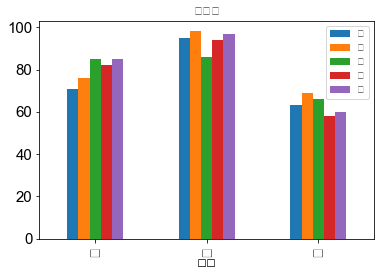

In [7]:
'''
random 生成亂數
pandas 簡易畫圖
'''
from random import randint

plt.rcParams['font.family']='sans-serif' 
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['axes.unicode_minus'] = False

data = [[randint(70, 90) for i in range(5)],
        [randint(80, 99) for i in range(5)],
        [randint(50, 70) for i in range(5)]]
col = list('國英數社自')
idx = list('陳王林')
df = pd.DataFrame(data, columns=col, index=idx)
df.plot(kind='bar', title=u'成績單', fontsize=15)
plt.xlabel(u"姓名", fontproperties='Tw Cen MT')